In [1]:
%load_ext autoreload
%autoreload 2

from ble import get_ble_controller
from base_ble import LOG
from cmd_types import CMD
import time
import numpy as np
import matplotlib.pyplot as plt

LOG.propagate = False

In [2]:
# Get ArtemisBLEController object
ble = get_ble_controller()

# Connect to the Artemis Device
ble.connect()

2023-02-21 00:39:35,261 | INFO     |: Looking for Artemis Nano Peripheral Device: C0:83:10:69:2C:3C
2023-02-21 00:39:37,917 | INFO     |: Connected to C0:83:10:69:2C:3C


D:\Workspace\ECE-5160-Sp23\ble_robot-1.1\ble_python\base_ble.py:87: FutureWarning: This method will be removed future version, pass the callback to the BleakClient constructor instead.
  self.client.set_disconnected_callback(self.disconnect_handler)


In [25]:
time_list = []
tof1_list = []
tof2_list = []
accp_list = []
accr_list = []
gyrp_list = []
gyrr_list = []

In [26]:
def get_tof_cb(uuid, byte_array):
    global time_list, tof1_list, tof2_list
    if byte_array is not None:
        s = byte_array.decode("utf-8")
        s = s.split("|")  # split each reading
        
        time_list.append(int( s[0].split(":")[1] ))
        tof1_list.append(int( s[1].split(":")[1] ))
        tof2_list.append(int( s[2].split(":")[1] ))
        accp_list.append(float( s[3].split(":")[1] ))
        accr_list.append(float( s[4].split(":")[1] ))
        gyrp_list.append(float( s[5].split(":")[1] ))
        gyrr_list.append(float( s[6].split(":")[1] ))
        
        # print(s)

In [27]:
ble.start_notify(ble.uuid['RX_STRING'], get_tof_cb)

In [28]:
start_time = time.time()
while time.time() < start_time + 20:
    ble.send_command(CMD.PING, "")
    # time.sleep(2)

In [63]:
avg_trans = 20 * 1000 / len(time_list)
print("average interval: ", avg_trans)

average interval:  126.58227848101266


In [22]:
ble.stop_notify(ble.uuid['RX_STRING'])

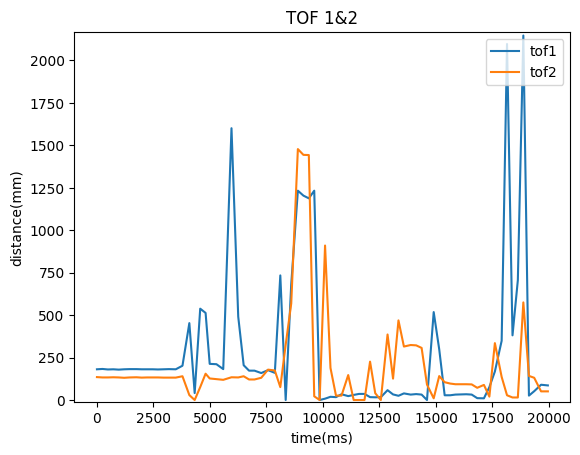

In [58]:
time_list = [x - time_list[0] for x in time_list]
plt.plot(time_list, tof1_list, label='tof1')
plt.plot(time_list, tof2_list, label='tof2')
plt.ylim(min([min(tof1_list), min(tof2_list)]) - 10, max([max(tof1_list), max(tof2_list)]) + 20)
plt.title('TOF 1&2')
plt.legend(loc="upper right")
plt.xlabel('time(ms)')
plt.ylabel('distance(mm)')
plt.show()

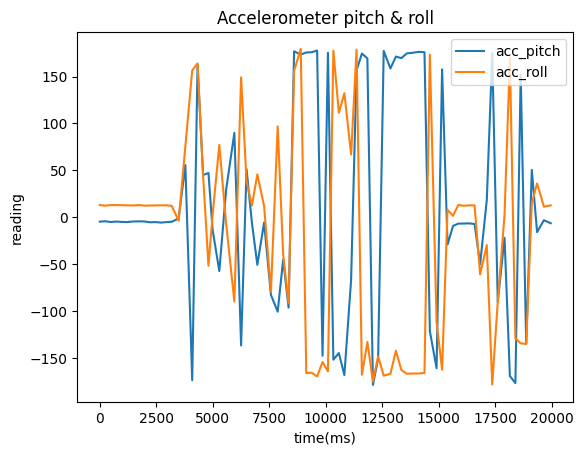

In [59]:
plt.plot(time_list, accp_list, label='acc_pitch')
plt.plot(time_list, accr_list, label='acc_roll')
plt.legend(loc="upper right")
plt.title('Accelerometer pitch & roll')
plt.xlabel('time(ms)')
plt.ylabel('reading')
plt.show()

In [61]:
# pitch_fft = np.fft.fft(accp_list)
# roll_fft  = np.fft.fft(accr_list)
# # lowpass
# pitch_fft_lp = pitch_fft
# roll_fft_lp = roll_fft
# pitch_fft_lp[-80:] = np.zeros(80)
# roll_fft_lp[-80:] = np.zeros(80)
# pitch_ifft = np.fft.ifft(pitch_fft_lp)
# roll_ifft = np.fft.ifft(roll_fft_lp)

# plt.plot(time_list, pitch_ifft, label='acc_pitch')
# plt.plot(time_list, roll_ifft, label='acc_roll')
# plt.title('Gyroscope pitch & roll')
# plt.legend(loc="upper right")
# plt.xlabel('time(ms)')
# plt.ylabel('reading')
# plt.show()

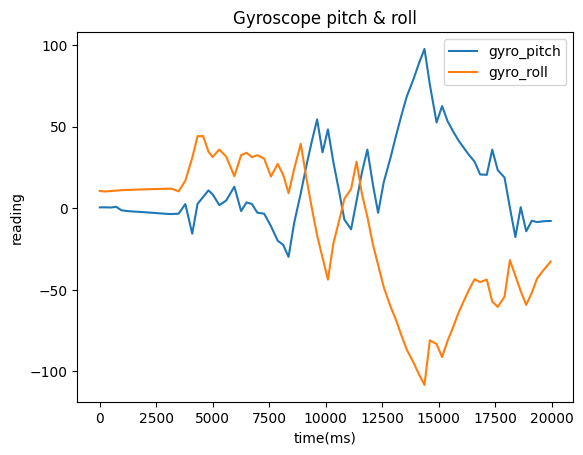

In [62]:
plt.plot(time_list, gyrp_list, label='gyro_pitch')
plt.plot(time_list, gyrr_list, label='gyro_roll')
plt.title('Gyroscope pitch & roll')
plt.legend(loc="upper right")
plt.xlabel('time(ms)')
plt.ylabel('reading')
plt.show()

In [ ]:
# Disconnect
ble.disconnect()